In [140]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

In [141]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [142]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [143]:
age_or_salary = (y == 0) | (y == 1)
X = X[age_or_salary]
y = y[age_or_salary]

In [144]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [145]:
def plot_svc_decision_boundary(support_vectors_, svm_clf, xmin, xmax, warna):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 5)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2, color=warna)
    plt.plot(x0, gutter_up, "k--", linewidth=2, color=warna)
    plt.plot(x0, gutter_down, "k--", linewidth=2, color=warna)

In [146]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=0.1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=10, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])


scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

C:\Users\GKI Kota Modern\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge', random_state=42))])

In [147]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(-2.0, 2.0, -4.0, 6.0)

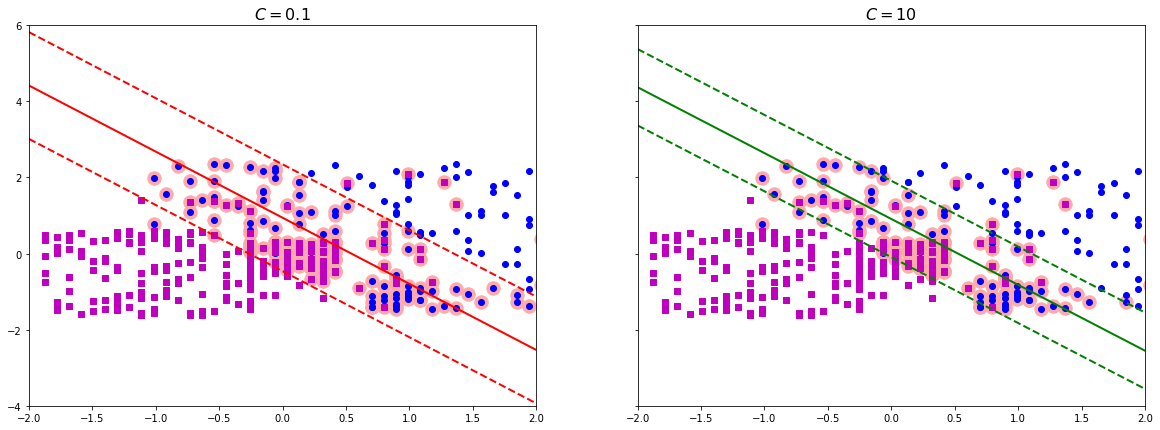

In [148]:
fig, axes = plt.subplots(ncols=2, figsize=(20,7), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf1.support_vectors_, svm_clf1, -2, 2, 'red')
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([-2, 2, -4, 6])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf2.support_vectors_,svm_clf2, -2, 2, 'green')
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([-2, 2, -4, 6])

(-2.0, 2.0, -4.0, 6.0)

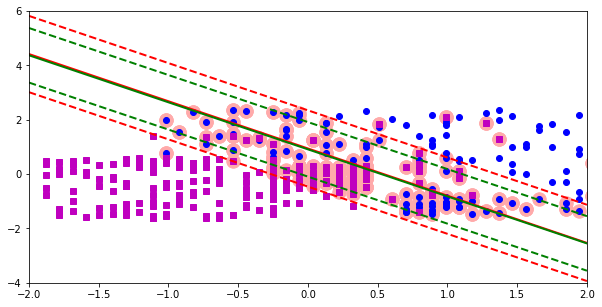

In [149]:
fig, axes = plt.subplots(ncols=1, figsize=(10,5), sharey=True)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf1.support_vectors_, svm_clf1, -2, 2, 'red')
plot_svc_decision_boundary(svm_clf2.support_vectors_,svm_clf2, -2, 2, 'green')
plt.axis([-2, 2, -4, 6])

In [150]:
y_pred1 = svm_clf1.predict(X)

In [151]:
y_pred2 = svm_clf2.predict(X)

In [152]:
confu_matrix_1 = confusion_matrix(y, y_pred1)
confu_matrix_1

array([[240,  17],
       [ 47,  96]], dtype=int64)

In [153]:
sensitivity1 = confu_matrix_1[1][1]/sum(confu_matrix_1[1])*100
sensitivity1

67.13286713286713

In [154]:
accuracy1 = (confu_matrix_1[0][0]+confu_matrix_1[1][1])/(sum(confu_matrix_1[0])+sum(confu_matrix_1[1]))*100
accuracy1

84.0

In [155]:
specificity1 = confu_matrix_1[0][0]/sum(confu_matrix_1[0])*100
specificity1

93.3852140077821

In [156]:
npv1 = confu_matrix_1[0][0]/(confu_matrix_1[0][0]+confu_matrix_1[1][0])*100
npv1

83.62369337979094

In [157]:
precision1 = confu_matrix_1[1][1]/(confu_matrix_1[0][1]+confu_matrix_1[1][1])*100
precision1

84.95575221238938

In [158]:
confu_matrix_2 = confusion_matrix(y, y_pred2)
confu_matrix_2

array([[240,  17],
       [ 46,  97]], dtype=int64)

In [159]:
sensitivity2 = confu_matrix_2[1][1]/sum(confu_matrix_2[1])*100
sensitivity2

67.83216783216784

In [160]:
accuracy2 = (confu_matrix_2[0][0]+confu_matrix_2[1][1])/(sum(confu_matrix_2[0])+sum(confu_matrix_2[1]))*100
accuracy2

84.25

In [161]:
specificity2 = confu_matrix_2[0][0]/sum(confu_matrix_2[0])*100
specificity2

93.3852140077821

In [162]:
npv2 = confu_matrix_2[0][0]/(confu_matrix_2[0][0]+confu_matrix_2[1][0])*100
npv2

83.91608391608392

In [163]:
precision2 = confu_matrix_2[1][1]/(confu_matrix_2[0][1]+confu_matrix_2[1][1])*100
precision2

85.08771929824562

In [164]:
#Menurut saya, model SVM Linear yang lebih baik adalah model dengan C=10 karena tingkat persentase dalam perhitungan
#data confusion matriksnya semuanya sama dengan atau lebih tinggi dari yang model C=0.1

#Dampak perbedaan nilai C membuat jarak garis scalar lebih kecil atau makin akurat. 

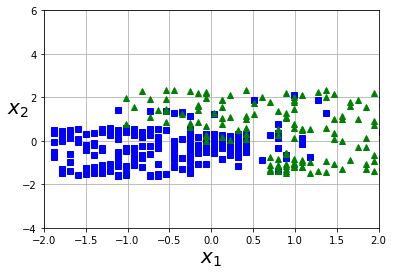

In [165]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-2, 2, -4, 6])
plt.show()

In [166]:
polynomial_svm_clf1 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(loss="hinge", random_state=42))
    ])

polynomial_svm_clf2 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(loss="hinge", random_state=42))
    ])

polynomial_svm_clf3 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(loss="hinge", random_state=42))
    ])

polynomial_svm_clf1.fit(X, y)
polynomial_svm_clf2.fit(X, y)
polynomial_svm_clf3.fit(X, y)

C:\Users\GKI Kota Modern\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\GKI Kota Modern\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\GKI Kota Modern\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(loss='hinge', random_state=42))])

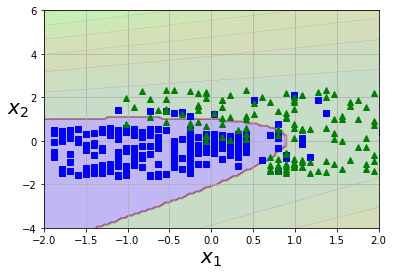

In [167]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.axis(axes)

plot_predictions(polynomial_svm_clf1, [-2, 2, -4, 6])
plot_dataset(X, y, [-2, 2, -4, 6])
plt.show()

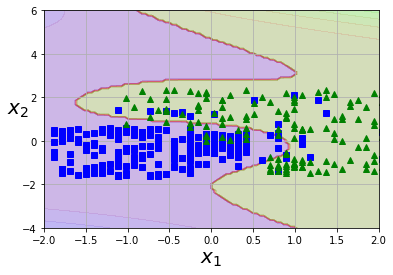

In [168]:
plot_predictions(polynomial_svm_clf2, [-2, 2, -4, 6])
plot_dataset(X, y, [-2, 2, -4, 6])
plt.show()

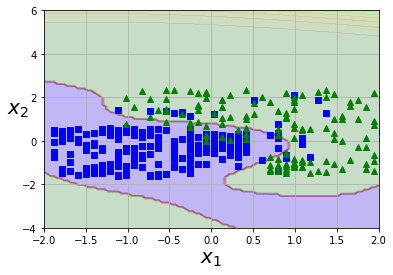

In [169]:
plot_predictions(polynomial_svm_clf3, [-2, 2, -4, 6])
plot_dataset(X, y, [-2, 2, -4, 6])
plt.show()

In [170]:
y_pred1 = polynomial_svm_clf1.predict(X)
y_pred2 = polynomial_svm_clf2.predict(X)
y_pred3 = polynomial_svm_clf3.predict(X)

In [171]:
confu_matrix1 = confusion_matrix(y, y_pred1)
confu_matrix1

array([[237,  20],
       [ 18, 125]], dtype=int64)

In [172]:
sensitivity_1 = confu_matrix1[1][1]/sum(confu_matrix1[1])*100
sensitivity_1

87.41258741258741

In [173]:
accuracy_1 = (confu_matrix1[0][0]+confu_matrix1[1][1])/(sum(confu_matrix1[0])+sum(confu_matrix1[1]))*100
accuracy_1

90.5

In [174]:
specificity_1 = confu_matrix1[0][0]/sum(confu_matrix1[0])*100
specificity_1

92.21789883268482

In [175]:
npv_1 = confu_matrix1[0][0]/(confu_matrix1[0][0]+confu_matrix1[1][0])*100
npv_1

92.94117647058823

In [176]:
precision_1 = confu_matrix1[1][1]/(confu_matrix1[0][1]+confu_matrix1[1][1])*100
precision_1

86.20689655172413

In [177]:
confu_matrix2 = confusion_matrix(y, y_pred2)
confu_matrix2

array([[236,  21],
       [ 14, 129]], dtype=int64)

In [178]:
sensitivity_2 = confu_matrix2[1][1]/sum(confu_matrix2[1])*100
sensitivity_2

90.20979020979021

In [179]:
accuracy_2 = (confu_matrix2[0][0]+confu_matrix2[1][1])/(sum(confu_matrix2[0])+sum(confu_matrix2[1]))*100
accuracy_2

91.25

In [180]:
specificity_2 = confu_matrix2[0][0]/sum(confu_matrix2[0])*100
specificity_2

91.82879377431907

In [181]:
npv_2 = confu_matrix2[0][0]/(confu_matrix2[0][0]+confu_matrix2[1][0])*100
npv_2

94.39999999999999

In [182]:
precision_2 = confu_matrix2[1][1]/(confu_matrix2[0][1]+confu_matrix2[1][1])*100
precision_2

86.0

In [183]:
confu_matrix3 = confusion_matrix(y, y_pred3)
confu_matrix3

array([[236,  21],
       [ 14, 129]], dtype=int64)

In [184]:
sensitivity_3 = confu_matrix3[1][1]/sum(confu_matrix3[1])*100
sensitivity_3

90.20979020979021

In [185]:
accuracy_3 = (confu_matrix3[0][0]+confu_matrix3[1][1])/(sum(confu_matrix3[0])+sum(confu_matrix3[1]))*100
accuracy_3

91.25

In [186]:
specificity_3 = confu_matrix3[0][0]/sum(confu_matrix3[0])*100
specificity_3

91.82879377431907

In [187]:
npv_3 = confu_matrix3[0][0]/(confu_matrix3[0][0]+confu_matrix3[1][0])*100
npv_3

94.39999999999999

In [188]:
precision_3 = confu_matrix3[1][1]/(confu_matrix3[0][1]+confu_matrix3[1][1])*100
precision_3

86.0

In [ ]:
#Menurut saya, model SVM non-Linear yang lebih baik adalah model dengan degree=5 dan 10 karena hasil hitungnya sama, 
#tapi grafik beda sedikit, karena tingkat persentase dalam perhitungan data confusion matriksnya hampir semua 
#lebih tinggi dari yang model yang degree = 2

#Dampak perbedaan nilai degree membuat derajat garis scalar lebih besar belokannya atau makin akurat. 